# IMAGEN A MATRIZ


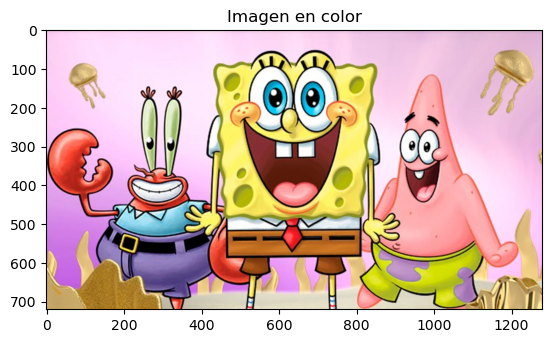

[[[255 244 255]
  [255 244 255]
  [255 244 255]
  ...
  [255 245 253]
  [255 245 253]
  [255 245 253]]

 [[241 227 241]
  [241 227 241]
  [241 227 241]
  ...
  [239 224 233]
  [239 224 233]
  [239 224 233]]

 [[222 203 221]
  [222 203 221]
  [222 203 221]
  ...
  [209 186 201]
  [209 186 201]
  [209 186 201]]

 ...

 [[204 171 109]
  [203 169 108]
  [203 169 108]
  ...
  [255 240 168]
  [255 240 168]
  [255 240 168]]

 [[204 171 109]
  [203 169 108]
  [203 169 108]
  ...
  [255 240 168]
  [255 240 168]
  [255 240 168]]

 [[204 171 109]
  [203 169 108]
  [203 169 108]
  ...
  [255 240 168]
  [255 240 168]
  [255 240 168]]]
Dimensiones de la matriz: (720, 1280, 3)


In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen usando Pillow
image_path = 'imagenDos.png'
img = Image.open(image_path)

# Convertir la imagen a una matriz NumPy
img_array = np.array(img)

# Mostrar la imagen usando matplotlib
plt.imshow(img_array) 
plt.title('Imagen en color')
plt.show()

# Imprimir la matriz NumPy y sus dimensiones
print(img_array)
print(f"Dimensiones de la matriz: {img_array.shape}")



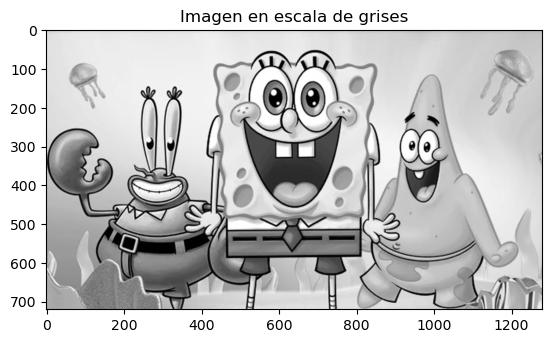

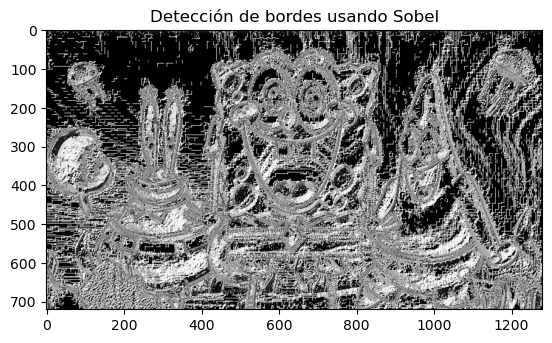

Dimensiones de la matriz original: (720, 1280)
Dimensiones de la matriz Sobel: (720, 1280)


In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

# Cargar la imagen usando Pillow
image_path = 'imagenDos.png'
img = Image.open(image_path)

# Convertir la imagen a una matriz NumPy y convertirla a escala de grises
img_gray = img.convert('L')  # Convertimos la imagen a escala de grises
img_array = np.array(img_gray)

# Mostrar la imagen en escala de grises usando matplotlib
plt.imshow(img_array, cmap='gray') 
plt.title('Imagen en escala de grises')
plt.show()

# Aplicar el filtro Sobel en los ejes X e Y
sobel_x = ndimage.sobel(img_array, axis=0)  # Detecta bordes horizontales
sobel_y = ndimage.sobel(img_array, axis=1)  # Detecta bordes verticales

# Calcular la magnitud del gradiente combinando Sobel X y Sobel Y
sobel_magnitude = np.hypot(sobel_x, sobel_y)  # Magnitud del gradiente
sobel_magnitude = sobel_magnitude / np.max(sobel_magnitude) * 255  # Normalización

# Mostrar el resultado del filtro Sobel
plt.imshow(sobel_magnitude, cmap='gray')
plt.title('Detección de bordes usando Sobel')
plt.show()

# Imprimir las dimensiones de la imagen y los bordes detectados
print(f"Dimensiones de la matriz original: {img_array.shape}")
print(f"Dimensiones de la matriz Sobel: {sobel_magnitude.shape}")


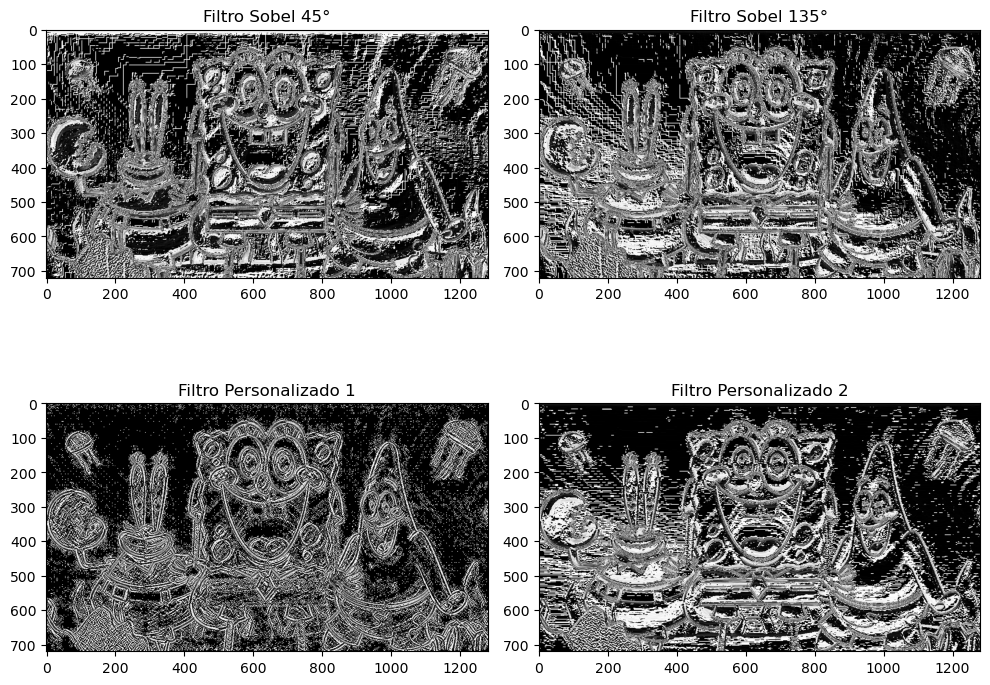

In [3]:
import numpy as np
from scipy.ndimage import convolve
import matplotlib.pyplot as plt

# Crear nuevas matrices de convolución (kernels)
sobel_45 = np.array([[-2, -1, 0],
                     [-1,  0, 1],
                     [ 0,  1, 2]])

sobel_135 = np.array([[ 0, 1, 2],
                      [-1, 0, 1],
                      [-2,-1, 0]])

# Filtros aleatorios personalizados (por ejemplo, para suavizar y detectar otros patrones)
custom_kernel_1 = np.array([[1, 0, -1],
                            [0, 0,  0],
                            [-1, 0,  1]])

custom_kernel_2 = np.array([[ 1,  1,  1],
                            [ 0,  0,  0],
                            [-1, -1, -1]])

# Aplicar los filtros personalizados a la imagen
sobel_45_result = convolve(img_array, sobel_45)
sobel_135_result = convolve(img_array, sobel_135)
custom_1_result = convolve(img_array, custom_kernel_1)
custom_2_result = convolve(img_array, custom_kernel_2)

# Mostrar los resultados de los nuevos filtros
plt.figure(figsize=(10, 8))

plt.subplot(221)
plt.imshow(sobel_45_result, cmap='gray')
plt.title('Filtro Sobel 45°')

plt.subplot(222)
plt.imshow(sobel_135_result, cmap='gray')
plt.title('Filtro Sobel 135°')

plt.subplot(223)
plt.imshow(custom_1_result, cmap='gray')
plt.title('Filtro Personalizado 1')

plt.subplot(224)
plt.imshow(custom_2_result, cmap='gray')
plt.title('Filtro Personalizado 2')

plt.tight_layout()
plt.show()


## 1. Traslación

La traslación desplaza todos los píxeles de la imagen por una cantidad fija en los ejes X e Y.

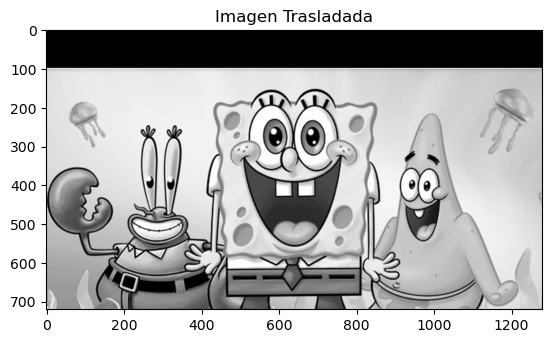

In [11]:
from scipy.ndimage import affine_transform
import numpy as np
import matplotlib.pyplot as plt

# Aumentar los valores de traslación para que sea más notoria
tx, ty = 100,0  # Mover la imagen 150 píxeles en X y 100 en Y

# Matriz de transformación afín para traslación
# Notar que es de 2x3: aplicable directamente en 2D (sin coordenadas homogéneas)
translation_matrix = np.array([[1, 0, -tx],
                               [0, 1, -ty],
                              [0,0,1]])

# Aplicar la traslación especificando los desplazamientos (tx, ty)
translated_image = affine_transform(img_array, translation_matrix, offset=[-tx, -ty])

# Mostrar la imagen trasladada
plt.imshow(translated_image, cmap='gray')
plt.title('Imagen Trasladada')
plt.show()


## 2. Rotación 

La rotación gira la imagen alrededor de un punto (normalmente el origen).

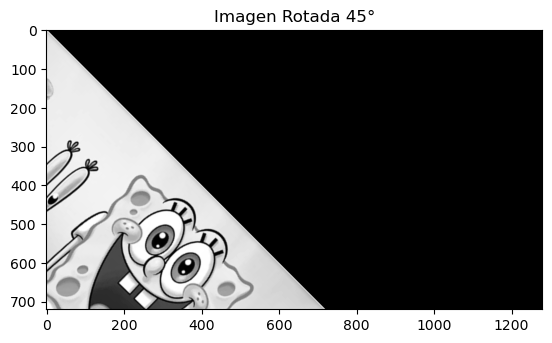

In [5]:
theta = np.radians(45)  # Rotar 45 grados
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta), 0],
                            [np.sin(theta), np.cos(theta), 0],
                            [0, 0, 1]])

rotated_image = affine_transform(img_array, rotation_matrix)

plt.imshow(rotated_image, cmap='gray')
plt.title('Imagen Rotada 45°')
plt.show()


## 3. Cizallamiento

El cizallamiento deforma la imagen de manera que las líneas paralelas permanecen paralelas, pero los ángulos cambian.

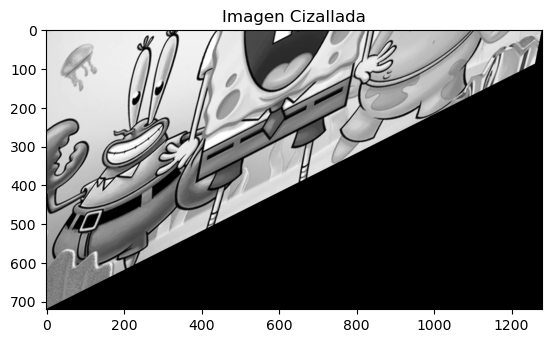

In [6]:
sh_x, sh_y = 0.5, 0.2  # Factores de cizallamiento
shearing_matrix = np.array([[1, sh_x, 0],
                            [sh_y, 1, 0],
                            [0, 0, 1]])

sheared_image = affine_transform(img_array, shearing_matrix)

plt.imshow(sheared_image, cmap='gray')
plt.title('Imagen Cizallada')
plt.show()


## 4. Escalado 

El escalado cambia el tamaño de la imagen, aumentando o disminuyendo la distancia entre los píxeles.

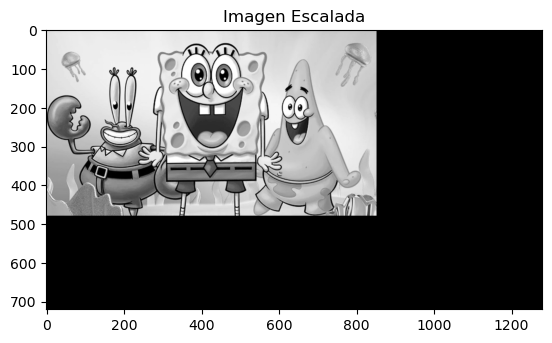

In [7]:
sx, sy = 1.5, 1.5  # Aumentar el tamaño en 1.5 veces
scaling_matrix = np.array([[sx, 0, 0],
                           [0, sy, 0],
                           [0, 0, 1]])

scaled_image = affine_transform(img_array, scaling_matrix)

plt.imshow(scaled_image, cmap='gray')
plt.title('Imagen Escalada')
plt.show()
